<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Import Needed Libraries
    </h1>
    </div>

In [395]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import tensorflow as tf
import keras
from sklearn.metrics import  ConfusionMatrixDisplay, classification_report , accuracy_score , confusion_matrix
import warnings
warnings.filterwarnings('ignore')

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Reading Dataset And Get Info
    </h1>
    </div>

In [396]:
df = pd.read_csv('loan_data.csv')

In [397]:
# Show Sample of Data
df.sample(5)

person_age person_gender person_education  person_income  \
10411        24.0        female      High School        74917.0   
25283        31.0          male        Associate       100168.0   
34268        22.0          male        Associate        73330.0   
1117         23.0        female         Bachelor        42839.0   
35209        25.0        female         Bachelor        72896.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
10411               1              MORTGAGE    19600.0  DEBTCONSOLIDATION   
25283               7              MORTGAGE    12000.0            VENTURE   
34268               2              MORTGAGE    13000.0            MEDICAL   
1117                0                  RENT    17000.0          EDUCATION   
35209               2              MORTGAGE     1500.0            MEDICAL   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
10411          15.65                 0.26                         2.0   
25283           6.62                 0.12                         8.0   
34268           9.64                 0.18                         4.0   
1117           10.37                 0.40                         2.0   
35209          13.33                 0.02                         5.0   

       credit_score previous_loan_defaults_on_file  loan_status  
10411           539                             No            1  
25283           640                            Yes            0  
34268           495                            Yes            0  
1117            658                             No            1  
35209           631                            Yes            0

In [398]:
# Show Shape of Data
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 45000
Number of Columns : 14


In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [400]:
# Check NaN Value
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [401]:
# Describe Numiric Data
df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

- Maximum person age 144 not reality
- person_income (Annual income) and person_emp_exp (Years of employment experience) in my opinion contain outlier

In [402]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

Count  Null  Null %  Cardinality
person_age                      45000     0     0.0           60
person_gender                   45000     0     0.0            2
person_education                45000     0     0.0            5
person_income                   45000     0     0.0        33989
person_emp_exp                  45000     0     0.0           63
person_home_ownership           45000     0     0.0            4
loan_amnt                       45000     0     0.0         4483
loan_intent                     45000     0     0.0            6
loan_int_rate                   45000     0     0.0         1302
loan_percent_income             45000     0     0.0           64
cb_person_cred_hist_length      45000     0     0.0           29
credit_score                    45000     0     0.0          340
previous_loan_defaults_on_file  45000     0     0.0            2
loan_status                     45000     0     0.0            2

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Detection Outliers 
    </h1>
    </div>

In [403]:
def detect_outliers_iqr(df, columns, threshold = 1.5):

    outlier_indices = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Finding outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outlier_indices[col] = outliers
    
    return outlier_indices

numerical_columns = ['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income',
                     'cb_person_cred_hist_length','credit_score']
outliers_iqr = detect_outliers_iqr(df, numerical_columns)

for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers detected")

person_age: 2188 outliers detected
person_income: 2218 outliers detected
person_emp_exp: 1724 outliers detected
loan_amnt: 2348 outliers detected
loan_int_rate: 124 outliers detected
loan_percent_income: 744 outliers detected
cb_person_cred_hist_length: 1366 outliers detected
credit_score: 467 outliers detected


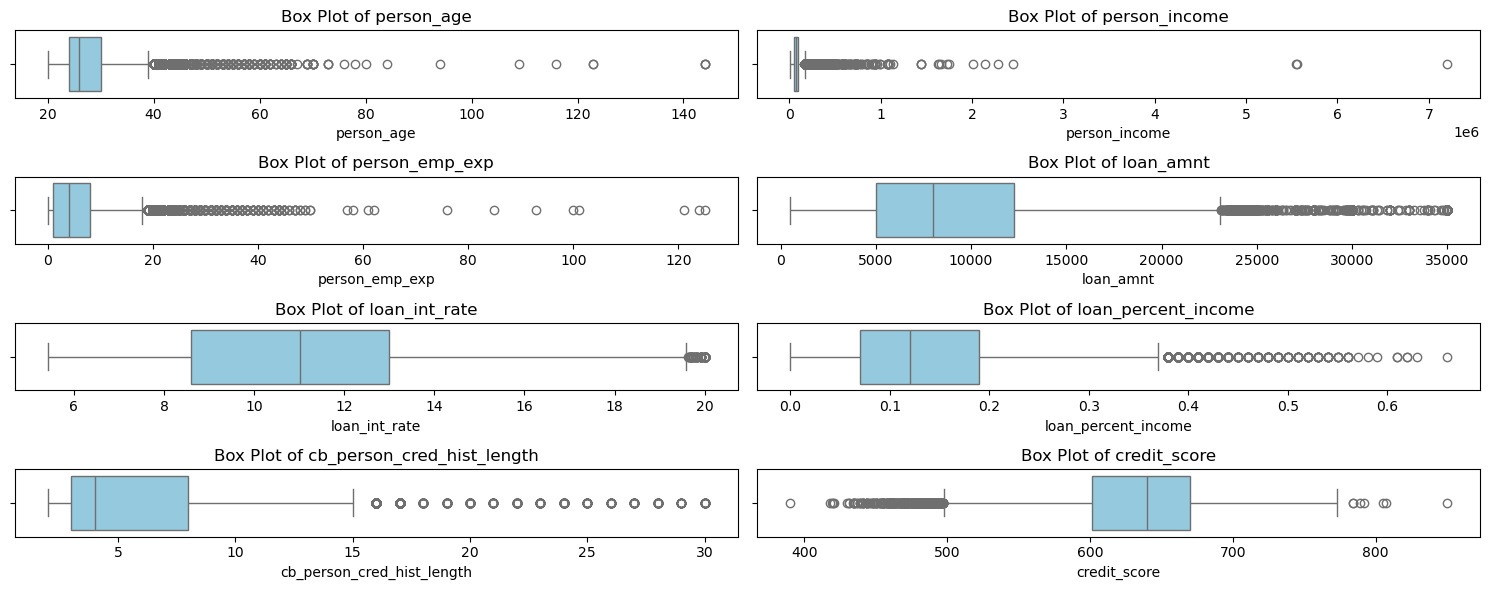

In [404]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)  
    sns.boxplot(x = df[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout() 
plt.show()

In [405]:
def remove_outliers(df, columns, threshold = 1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)  # First quartile (25%)
        Q3 = df_clean[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        df_clean = df_clean[(df_clean[col] > lower_bound) & (df_clean[col] < upper_bound)]
    
    return df_clean

df_cleaned = remove_outliers(df, numerical_columns)

In [406]:
# The New of Shape Cleaned Data
print(f"Number of Row : {df_cleaned.shape[0]}\nNumber of Columns : {df_cleaned.shape[1]}")

Number of Row : 35630
Number of Columns : 14


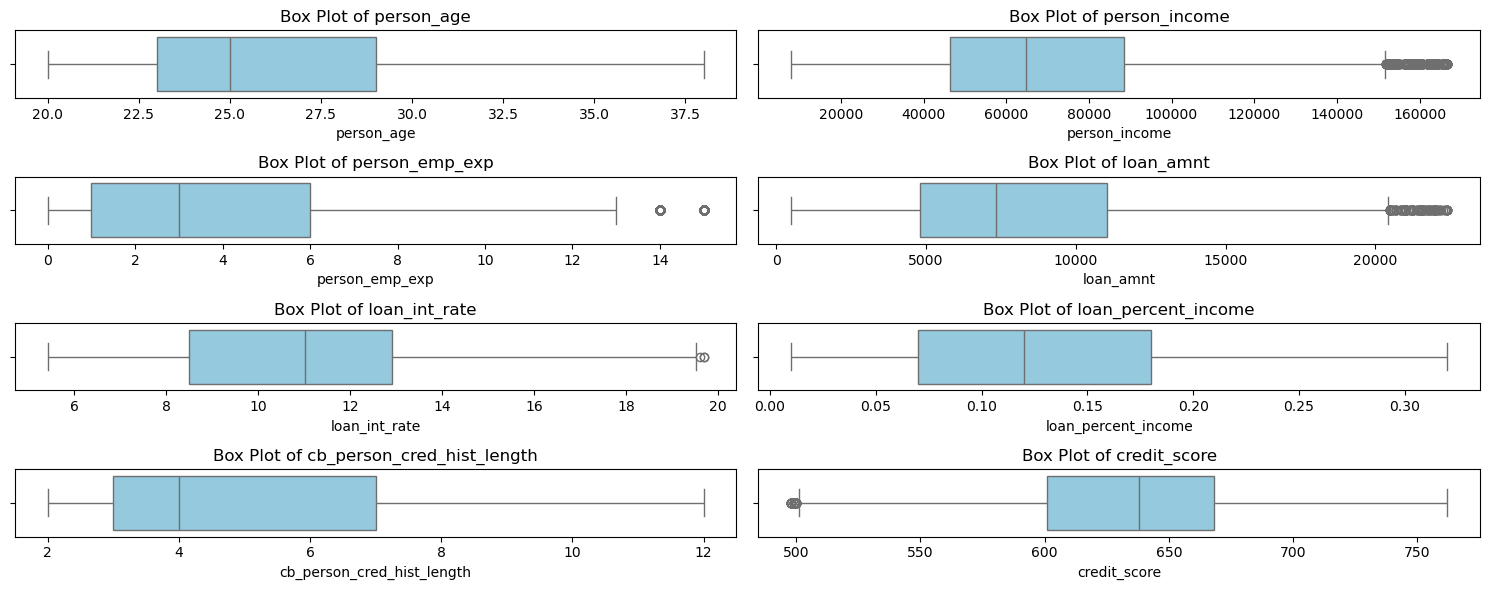

In [407]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i) 
    sns.boxplot(x = df_cleaned[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

In [408]:
df_cleaned.reset_index(inplace = True , drop = True)
df_cleaned.sample(5)

person_age person_gender person_education  person_income  \
19566        32.0          male      High School       115199.0   
10395        26.0          male           Master        68351.0   
17278        27.0        female        Associate        59933.0   
26225        23.0        female        Associate       144981.0   
27197        25.0          male         Bachelor        39577.0   

       person_emp_exp person_home_ownership  loan_amnt      loan_intent  \
19566              11                  RENT     6400.0  HOMEIMPROVEMENT   
10395               2                  RENT    10000.0  HOMEIMPROVEMENT   
17278               5                  RENT    11000.0          MEDICAL   
26225               1              MORTGAGE     6000.0          MEDICAL   
27197               1                  RENT     4500.0         PERSONAL   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
19566          11.54                 0.06                         5.0   
10395          12.69                 0.15                         2.0   
17278          11.01                 0.18                        10.0   
26225           9.72                 0.04                         3.0   
27197           7.39                 0.11                         2.0   

       credit_score previous_loan_defaults_on_file  loan_status  
19566           637                             No            0  
10395           634                             No            1  
17278           609                            Yes            0  
26225           671                             No            0  
27197           714                            Yes            0

In [409]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35630 entries, 0 to 35629
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      35630 non-null  float64
 1   person_gender                   35630 non-null  object 
 2   person_education                35630 non-null  object 
 3   person_income                   35630 non-null  float64
 4   person_emp_exp                  35630 non-null  int64  
 5   person_home_ownership           35630 non-null  object 
 6   loan_amnt                       35630 non-null  float64
 7   loan_intent                     35630 non-null  object 
 8   loan_int_rate                   35630 non-null  float64
 9   loan_percent_income             35630 non-null  float64
 10  cb_person_cred_hist_length      35630 non-null  float64
 11  credit_score                    35630 non-null  int64  
 12  previous_loan_defaults_on_file  

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         EDA of Data and Get Insights
    </h1>
    </div>

## Does Age Affect on Their Status of Loan ?

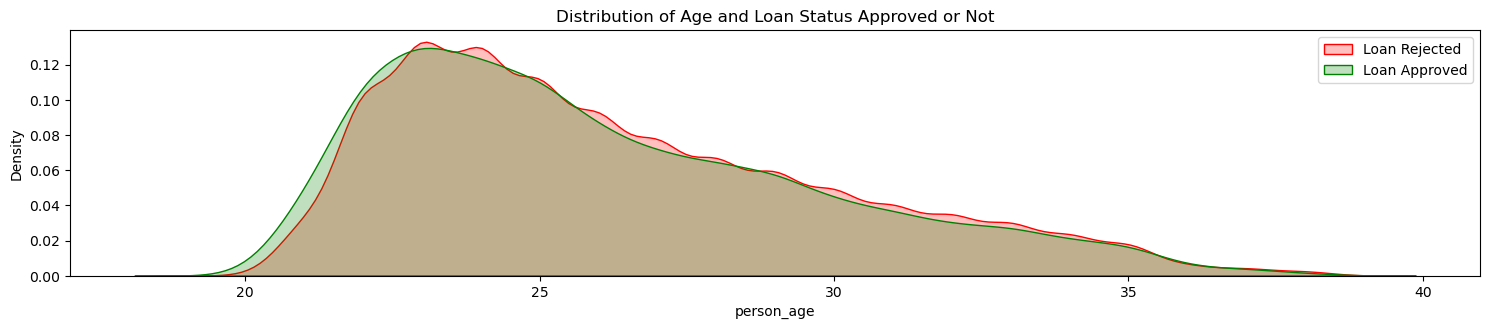

In [410]:
plt.figure(figsize=(15,6))

plt.subplot(2,1,1)

plt.title('Distribution of Age and Loan Status Approved or Not')
sns.kdeplot(df_cleaned[(df_cleaned['loan_status'] == 0)]['person_age'],color='red',fill=True,label='Loan Rejected')
sns.kdeplot(df_cleaned[(df_cleaned['loan_status'] == 1)]['person_age'],color='green',fill=True,label='Loan Approved')

plt.legend()
plt.tight_layout()
plt.show()

- Most of the ages of those who are accepted for loans range between 20 and 25. After this age, obtaining loans becomes more difficult.

## What is the gender of those whose loan application is accepted more ?

In [411]:
fig = px.pie(values = df_cleaned['person_gender'].value_counts(),
             names = ['male','female'],
             template = 'plotly_dark',
             title = 'The Percentage of Gender'
             ).update_traces(textinfo='label+percent')
fig.show()

- Males are the most in demand for loans.

In [412]:
fig = px.histogram(
    df_cleaned, 
    x='person_gender', 
    color='loan_status', 
    barmode='group',  
    title='Loan Acceptance by Gender (1 = approved; 0 = rejected)',
    labels={'count': 'Count','loan_status':'Loan Status','person_gender':'Person Gender'},
    template='plotly_dark',
    text_auto=True,
    color_discrete_map = {0:'#c71818',1:'#05fa15'}
)
fig.show()


- Gender does not affect obtaining a loan.

## Loan Approval by Education Level

In [413]:
fig = px.bar(df_cleaned['person_education'].value_counts(), 
    color=df_cleaned['person_education'].value_counts().index, 
    title='What most Education Level who needed Loan ?',
    labels={'person_education': 'Person Education','value':'Count','color':'Education Level'},
    template='plotly_dark',
    text_auto=True
)
fig.show()


- Most Education Level who needed Loan is Bachelor

In [414]:
fig = px.histogram(
    df_cleaned, 
    x='person_education', 
    color='loan_status', 
    barmode='group',  
    title='Loan Acceptance by Education Level (1 = approved; 0 = rejected)',
    labels={'count': 'Count','person_education': 'Person Education','loan_status':'Loan Status'},
    template='plotly_dark',
    text_auto=True,
    color_discrete_map = {0:'#c71818',1:'#05fa15'}
)
fig.show()

- Education Level not affect on Loan Approval

## Annual income and Loan amount requested	

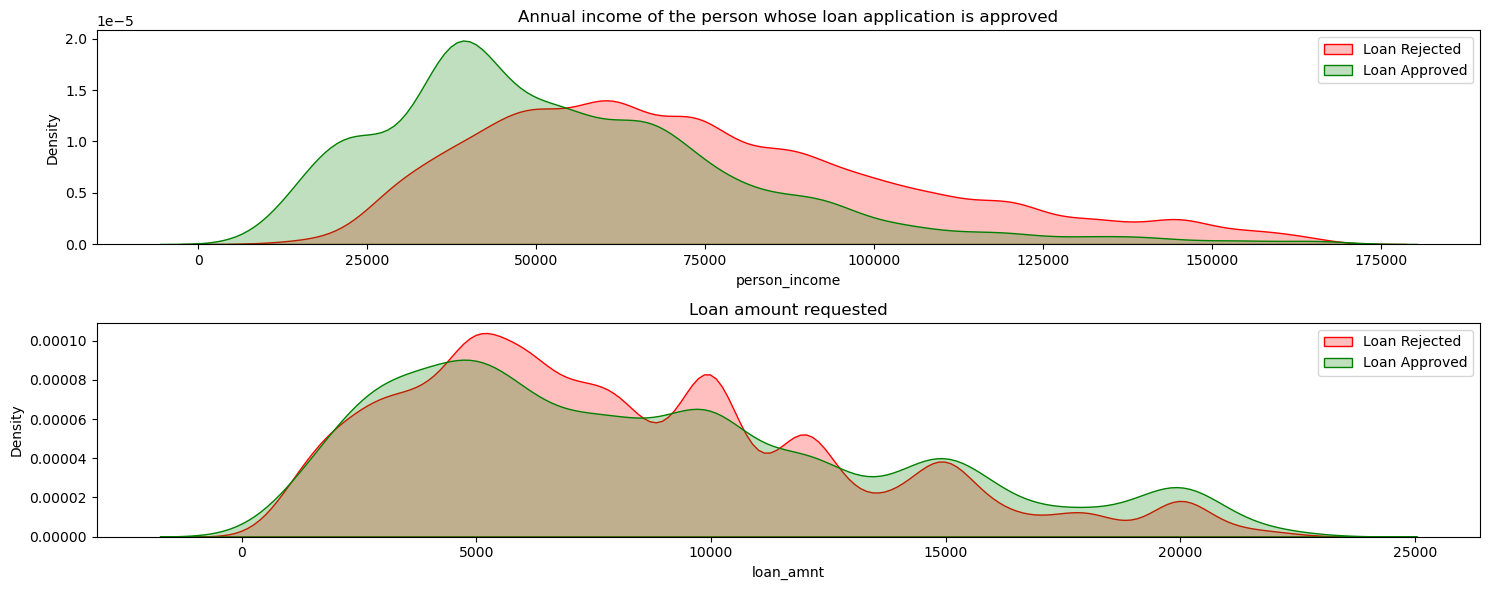

In [415]:
plt.figure(figsize=(15,6))

plt.subplot(2,1,1)

plt.title('Annual income of the person whose loan application is approved')
sns.kdeplot(df_cleaned[(df_cleaned['loan_status'] == 0)]['person_income'],color='red',fill=True,label='Loan Rejected')
sns.kdeplot(df_cleaned[(df_cleaned['loan_status'] == 1)]['person_income'],color='green',fill=True,label='Loan Approved')

plt.legend()

plt.subplot(2,1,2)

plt.title('Loan amount requested')
sns.kdeplot(df_cleaned[(df_cleaned['loan_status'] == 0)]['loan_amnt'],color='red',fill=True,label='Loan Rejected')
sns.kdeplot(df_cleaned[(df_cleaned['loan_status'] == 1)]['loan_amnt'],color='green',fill=True,label='Loan Approved')

plt.legend()
plt.tight_layout()
plt.show()

- Most annual income loan accepted less than 50000 (more than that rejected)
- loan amount accepted around than 15000 and more (less than may rejected)

In [416]:
df_cleaned.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        21.0        female      High School        12282.0               0   
1        21.0        female      High School        12951.0               0   
2        21.0        female      High School        12739.0               0   
3        24.0        female           Master        14283.0               1   
4        24.0        female         Bachelor        13866.0               0   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                   OWN     1000.0   EDUCATION          11.14   
1                   OWN     2500.0     VENTURE           7.14   
2                   OWN     1600.0     VENTURE          14.74   
3              MORTGAGE     1750.0   EDUCATION          10.99   
4                   OWN     1500.0    PERSONAL           7.29   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.08                         2.0           504   
1                 0.19                         2.0           532   
2                 0.13                         3.0           640   
3                 0.12                         2.0           679   
4                 0.11                         3.0           600   

  previous_loan_defaults_on_file  loan_status  
0                            Yes            0  
1                             No            1  
2                             No            1  
3                             No            1  
4                            Yes            0

## Is Home ownership status affect ?

In [417]:
fig = px.histogram(
    df_cleaned, 
    x='person_home_ownership', 
    color='loan_status', 
    barmode='group',  
    title='Loan Acceptance by Home ownership status (1 = approved; 0 = rejected)',
    labels={'count': 'Count','person_home_ownership': 'Home ownership status','loan_status':'Loan Status'},
    template='plotly_dark',
    text_auto=True,
    color_discrete_map = {0:'#c71818',1:'#05fa15'}
)
fig.show()

- Most Approval are Home Ownership Rent

## Total Insights
- Most of the ages of those who are accepted for loans range between 20 and 25. After this age, obtaining loans becomes more difficult.
- Males are the most in demand for loans.
- Gender does not affect obtaining a loan.
- Most Education Level who needed Loan is Bachelor
- Education Level not affect on Loan Approval
- Most annual income loan accepted less than 50000 (more than that rejected)
- loan amount accepted around than 15000 and more (less than may rejected)
- Most Approval are Home Ownership Rent

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         Data Preprocessing
    </h1>
    </div>

## Handling Object DataType

### Encode Object DataType 

In [418]:
column_to_encode = df_cleaned.select_dtypes(object).columns.tolist()
le = LabelEncoder()
for column in column_to_encode:
    df_cleaned[column] = le.fit_transform(df_cleaned[column])

In [419]:
# Show Data After some of Encode
df_cleaned.head()

person_age  person_gender  person_education  person_income  person_emp_exp  \
0        21.0              0                 3        12282.0               0   
1        21.0              0                 3        12951.0               0   
2        21.0              0                 3        12739.0               0   
3        24.0              0                 4        14283.0               1   
4        24.0              0                 1        13866.0               0   

   person_home_ownership  loan_amnt  loan_intent  loan_int_rate  \
0                      2     1000.0            1          11.14   
1                      2     2500.0            5           7.14   
2                      2     1600.0            5          14.74   
3                      0     1750.0            1          10.99   
4                      2     1500.0            4           7.29   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.08                         2.0           504   
1                 0.19                         2.0           532   
2                 0.13                         3.0           640   
3                 0.12                         2.0           679   
4                 0.11                         3.0           600   

   previous_loan_defaults_on_file  loan_status  
0                               1            0  
1                               0            1  
2                               0            1  
3                               0            1  
4                               1            0

In [420]:
# Final Info after Encode
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35630 entries, 0 to 35629
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      35630 non-null  float64
 1   person_gender                   35630 non-null  int32  
 2   person_education                35630 non-null  int32  
 3   person_income                   35630 non-null  float64
 4   person_emp_exp                  35630 non-null  int64  
 5   person_home_ownership           35630 non-null  int32  
 6   loan_amnt                       35630 non-null  float64
 7   loan_intent                     35630 non-null  int32  
 8   loan_int_rate                   35630 non-null  float64
 9   loan_percent_income             35630 non-null  float64
 10  cb_person_cred_hist_length      35630 non-null  float64
 11  credit_score                    35630 non-null  int64  
 12  previous_loan_defaults_on_file  

## Assign feature and target variables

In [421]:
fig = px.imshow(df_cleaned.corr(), 
                text_auto=True, 
                color_continuous_scale = "tempo",  
                template='plotly_dark',
                title="Correlation Heatmap")
fig.update_layout(
    width=1000, 
    height=800  
)
fig.show()

In [422]:
X = df_cleaned.drop('loan_status' , axis = 1)
y = df_cleaned['loan_status']

def FeatureSelectionByPercentile(X,y,Percentile) : 
    FeatureSelection = SelectPercentile(score_func = f_classif, percentile=Percentile)
    X_Selected = FeatureSelection.fit_transform(X, y)
    NewData = pd.DataFrame(X_Selected,columns =[i for i,j in zip(X.columns,FeatureSelection.get_support()) if j ] )
    NewData['loan_status'] = y
    return NewData
    
NewData = FeatureSelectionByPercentile(X,y,80)      
NewData.head()

person_age  person_income  person_emp_exp  person_home_ownership  \
0        21.0        12282.0             0.0                    2.0   
1        21.0        12951.0             0.0                    2.0   
2        21.0        12739.0             0.0                    2.0   
3        24.0        14283.0             1.0                    0.0   
4        24.0        13866.0             0.0                    2.0   

   loan_amnt  loan_intent  loan_int_rate  loan_percent_income  \
0     1000.0          1.0          11.14                 0.08   
1     2500.0          5.0           7.14                 0.19   
2     1600.0          5.0          14.74                 0.13   
3     1750.0          1.0          10.99                 0.12   
4     1500.0          4.0           7.29                 0.11   

   cb_person_cred_hist_length  previous_loan_defaults_on_file  loan_status  
0                         2.0                             1.0            0  
1                         2.0                             0.0            1  
2                         3.0                             0.0            1  
3                         2.0                             0.0            1  
4                         3.0                             1.0            0

In [423]:
fig = px.imshow(NewData.corr(), 
                text_auto=True, 
                color_continuous_scale = "tempo",  
                template='plotly_dark',
                title="Correlation Heatmap")
fig.update_layout(
    width=1000, 
    height=800  
)
fig.show()

In [424]:
X = NewData.drop(['loan_status'] , axis = 1)
y = NewData['loan_status']

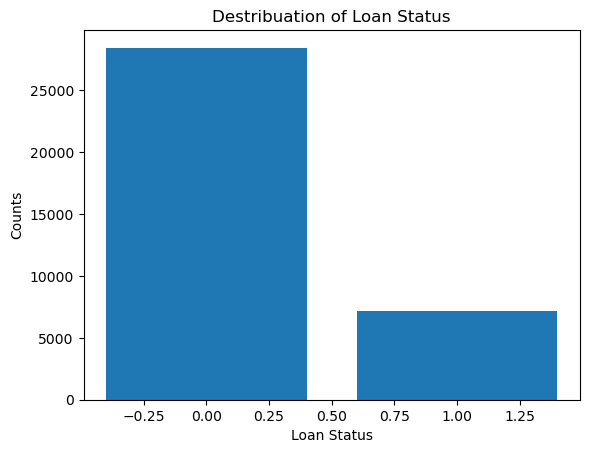

In [425]:
# check for imbalanced data
counts = y.value_counts()
plt.bar(counts.index , counts.values)
plt.title('Destribuation of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Counts')
plt.show()

### Handle Imbalanced Data

In [426]:
from imblearn.over_sampling import SMOTE
resampler = SMOTE()
X,y = resampler.fit_resample(X,y)

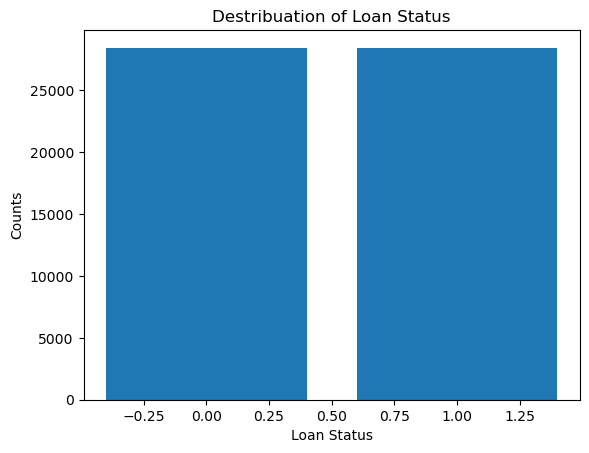

In [427]:
counts = y.value_counts()
plt.bar(counts.index , counts.values)
plt.title('Destribuation of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Counts')
plt.show()

## Splitting Data 

In [428]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 44 , shuffle = True)

In [429]:
print(f'Shape of X_Train {X_train.shape}')
print(f'Shape of X_Test {X_test.shape}')
print(f'Shape of Y_Train {y_train.shape}')
print(f'Shape of Y_Test {y_test.shape}')

Shape of X_Train (42640, 10)
Shape of X_Test (14214, 10)
Shape of Y_Train (42640,)
Shape of Y_Test (14214,)


In [430]:
# Show New Correlation
combined = pd.concat([X_train,y_train], axis=1)
fig = px.imshow(combined.corr(), 
                text_auto=True, 
                color_continuous_scale = "tempo",  
                template='plotly_dark',
                title="Correlation Heatmap")
fig.update_layout(
    width=1000, 
    height=800  
)
fig.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         Modeling
    </h1>
    </div>

## Use Different Models Algorithm

In [431]:
def train(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train,y_train)
    model_test_score = model.score(X_test,y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

def plot_Conf_Matrix(model):
    y_pred = model.predict(X_test)
    CM = confusion_matrix(y_test, y_pred)
    sns.heatmap(CM, center=True, cmap='Blues_r', annot=True, fmt='g') 
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

## Logistic Regression

In [432]:
lr = LogisticRegression()
train(lr, "Logistic Regression")

Logistic Regression model score on Training data: 76.16791744840525%
Logistic Regression model score on Testing data: 75.36935415787252%


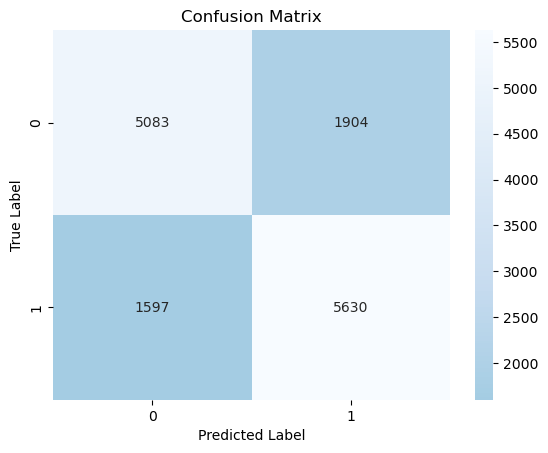

In [433]:
plot_Conf_Matrix(lr)

In [434]:
class_report(lr)

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      6987
           1       0.75      0.78      0.76      7227

    accuracy                           0.75     14214
   macro avg       0.75      0.75      0.75     14214
weighted avg       0.75      0.75      0.75     14214



## Random Forest

In [435]:
rf = RandomForestClassifier(n_estimators = 30 , max_depth = 15)
train(rf, "Random Forest")

Random Forest model score on Training data: 97.32879924953096%
Random Forest model score on Testing data: 93.9636977627691%


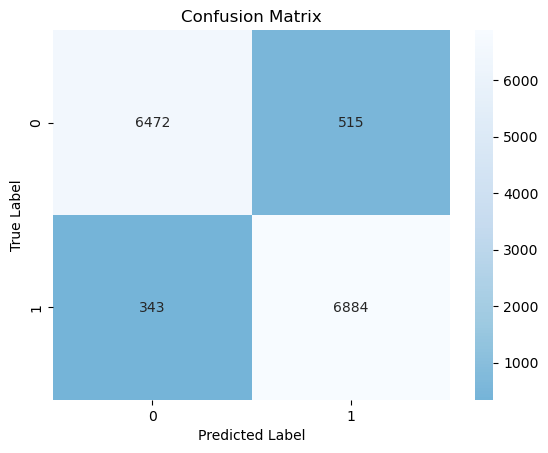

In [436]:
plot_Conf_Matrix(rf)

In [437]:
class_report(rf)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      6987
           1       0.93      0.95      0.94      7227

    accuracy                           0.94     14214
   macro avg       0.94      0.94      0.94     14214
weighted avg       0.94      0.94      0.94     14214



## KNN

In [438]:
knn = KNeighborsClassifier()
train(knn, "KNN")

KNN model score on Training data: 87.5844277673546%
KNN model score on Testing data: 81.69410440410863%


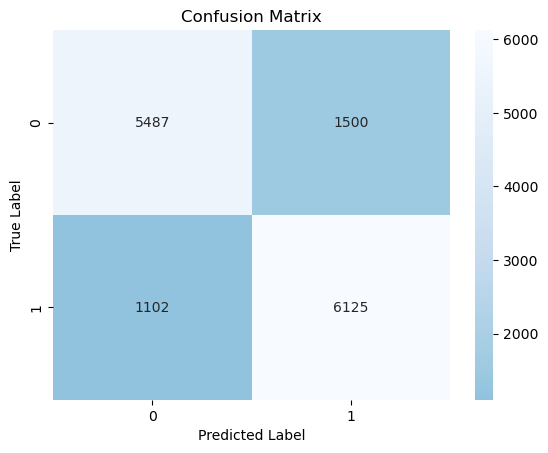

In [439]:
plot_Conf_Matrix(knn)

In [440]:
class_report(knn)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      6987
           1       0.80      0.85      0.82      7227

    accuracy                           0.82     14214
   macro avg       0.82      0.82      0.82     14214
weighted avg       0.82      0.82      0.82     14214



## Bagging

In [441]:
bagg_model = BaggingClassifier(n_estimators=60)
train(bagg_model, "Bagging")

Bagging model score on Training data: 99.99296435272045%
Bagging model score on Testing data: 94.60391163641481%


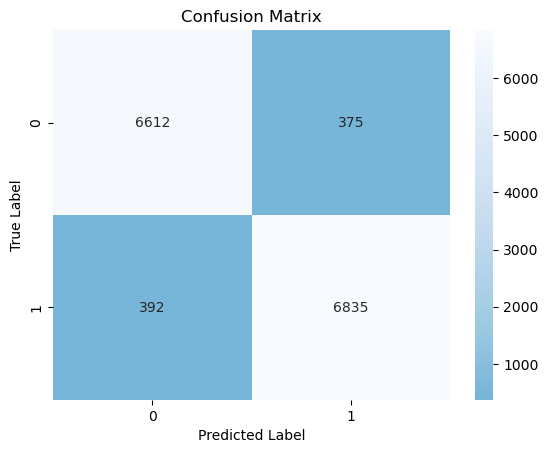

In [442]:
plot_Conf_Matrix(bagg_model)

In [443]:
class_report(bagg_model)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      6987
           1       0.95      0.95      0.95      7227

    accuracy                           0.95     14214
   macro avg       0.95      0.95      0.95     14214
weighted avg       0.95      0.95      0.95     14214



## Gradient Boosting

In [444]:
gb_model = GradientBoostingClassifier(n_estimators=100)
train(gb_model, "Boosting")

Boosting model score on Training data: 93.30440900562851%
Boosting model score on Testing data: 93.36569579288026%


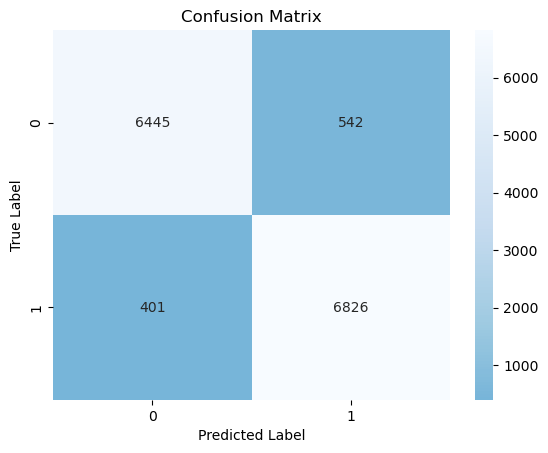

In [445]:
plot_Conf_Matrix(gb_model)

In [446]:
class_report(gb_model)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6987
           1       0.93      0.94      0.94      7227

    accuracy                           0.93     14214
   macro avg       0.93      0.93      0.93     14214
weighted avg       0.93      0.93      0.93     14214



## Decision Tree

In [447]:
dt_model = DecisionTreeClassifier(max_depth=12)
train(dt_model, "Decision Tree")

Decision Tree model score on Training data: 93.55065666041276%
Decision Tree model score on Testing data: 91.6983255944843%


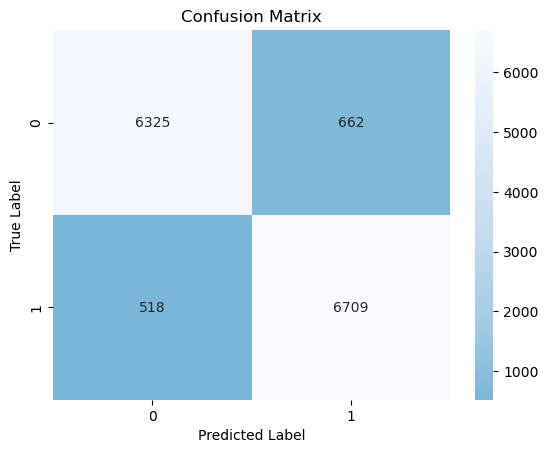

In [448]:
plot_Conf_Matrix(dt_model)

In [449]:
class_report(dt_model)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      6987
           1       0.91      0.93      0.92      7227

    accuracy                           0.92     14214
   macro avg       0.92      0.92      0.92     14214
weighted avg       0.92      0.92      0.92     14214



## Xgboost

In [450]:
xgboost = model = XGBClassifier(objective = "binary:logistic" , subsample = 0.7 , min_child_weight = 3,
                                max_depth = 3 , learning_rate = 0.1 , gamma = 0 , colsample_bytree = 0.5,)
train(xgboost, "Xgboost")

Xgboost model score on Training data: 92.66651031894935%
Xgboost model score on Testing data: 92.76065850569861%


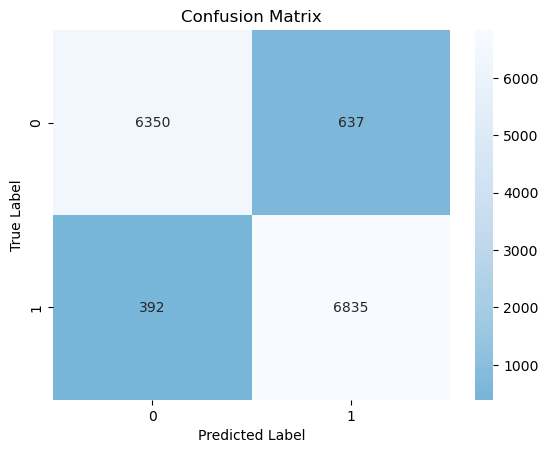

In [451]:
y_pred = xgboost.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, center=True, cmap='Blues_r', annot=True, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [455]:
class_report(xgboost)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      6987
           1       0.91      0.95      0.93      7227

    accuracy                           0.93     14214
   macro avg       0.93      0.93      0.93     14214
weighted avg       0.93      0.93      0.93     14214



- Best Model is BaggingClassifier with 95%

## Save Bagging Model 

In [453]:
joblib.dump(bagg_model,'Bagging.pkl')
joblib.dump(X_test,'x_test.pkl')
joblib.dump(y_test,'y_test.pkl')

['y_test.pkl']

## DNN (Deep Neural Network)

In [ ]:
KerasModel = keras.models.Sequential([
            keras.layers.Dense(8, activation = 'relu'),
            keras.layers.Dense(32, activation = 'relu'),
            keras.layers.Dense(128, activation = 'relu'),
            keras.layers.Dense(64, activation = 'relu'),
            keras.layers.Dense(32, activation = 'relu'),
            keras.layers.Dense(1, activation = 'sigmoid'),
            ])
KerasModel.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = KerasModel.fit(X_train,y_train,
                         validation_data=(X_test,y_test),
                         epochs=150,
                         batch_size=100,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=20,
                                            monitor='val_accuracy',
                                            restore_best_weights=True)])

Epoch 1/150
427/427 [==============================] - 1s 2ms/step - loss: 0.7136 - accuracy: 0.6543 - val_loss: 0.6117 - val_accuracy: 0.6800
Epoch 2/150
427/427 [==============================] - 1s 2ms/step - loss: 0.5942 - accuracy: 0.6747 - val_loss: 0.5967 - val_accuracy: 0.6530
Epoch 3/150
427/427 [==============================] - 1s 2ms/step - loss: 0.5878 - accuracy: 0.6785 - val_loss: 0.5864 - val_accuracy: 0.6760
Epoch 4/150
427/427 [==============================] - 1s 2ms/step - loss: 0.5857 - accuracy: 0.6816 - val_loss: 0.5883 - val_accuracy: 0.6762
Epoch 5/150
427/427 [==============================] - 1s 2ms/step - loss: 0.5860 - accuracy: 0.6816 - val_loss: 0.5873 - val_accuracy: 0.6734
Epoch 6/150
427/427 [==============================] - 1s 2ms/step - loss: 0.5848 - accuracy: 0.6818 - val_loss: 0.5835 - val_accuracy: 0.6788
Epoch 7/150
427/427 [==============================] - 1s 2ms/step - loss: 0.5855 - accuracy: 0.6792 - val_loss: 0.5823 - val_accuracy: 0.6731

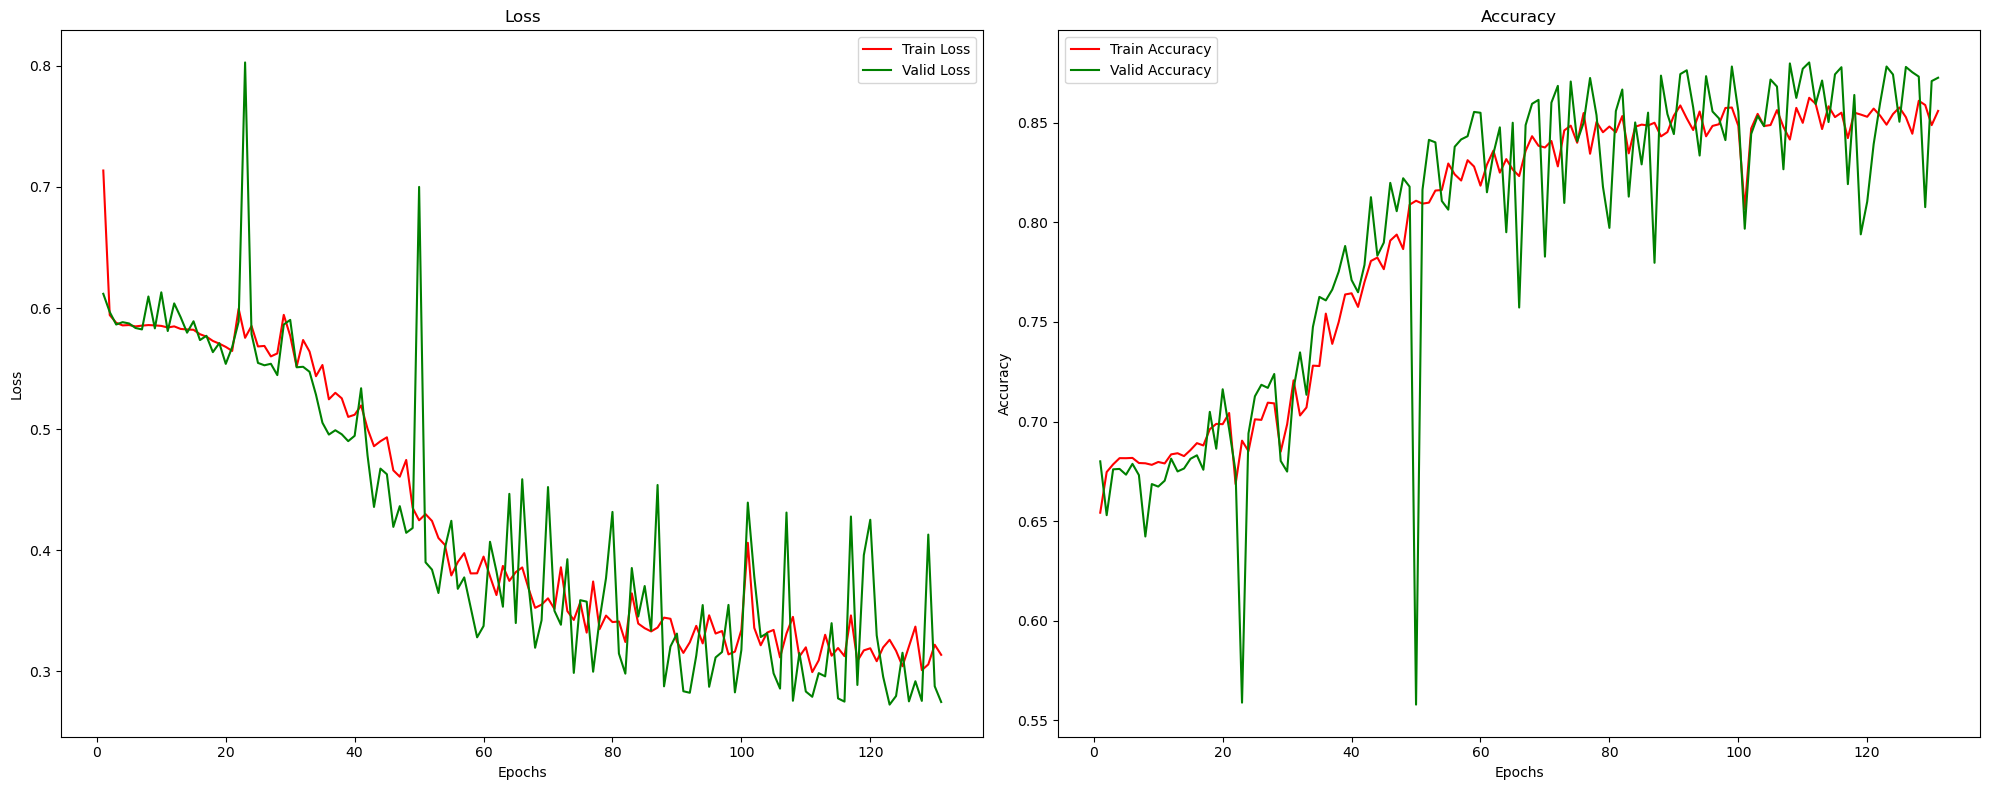

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))

445/445 [==============================] - 1s 1ms/step - loss: 0.2789 - accuracy: 0.8802
Model Loss is 0.27888599038124084
Model Accuracy is 0.880188524723053


In [ ]:
y_pred = KerasModel.predict(X_test)
print('Prediction Shape is {}'.format(y_pred.shape))
print('Prediction items are {}'.format(y_pred[:5]))
y_pred = [np.round(i[0]) for i in y_pred]

445/445 [==============================] - 0s 984us/step
Prediction Shape is (14214, 1)
Prediction items are [[0.00691929]
 [0.61788625]
 [0.98715645]
 [0.55874145]
 [0.22443168]]


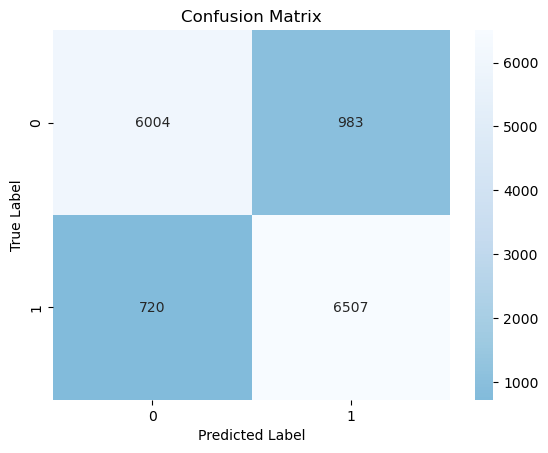

In [ ]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, center=True, cmap='Blues_r', annot=True, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       0.89      0.86      0.88      6987
           1       0.87      0.90      0.88      7227

    accuracy                           0.88     14214
   macro avg       0.88      0.88      0.88     14214
weighted avg       0.88      0.88      0.88     14214



In [ ]:
print(KerasModel.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 8)                 88        
                                                                 
 dense_26 (Dense)            (None, 64)                576       
                                                                 
 dense_27 (Dense)            (None, 128)               8320      
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
Total params: 19353 (75.60 KB)
Trainable params: 19353

In [ ]:
KerasModel.save('KerasModel.model')

INFO:tensorflow:Assets written to: KerasModel.model\assets


INFO:tensorflow:Assets written to: KerasModel.model\assets
